## Case study: How does a bike-share navigate speedy success?


## Overview

Cyclistc: é um programa de compartilhamento de bicicletas que possui mais de 5.800 bicicletas e 600 estações de ancoragem. A Cyclistic se destaca por oferecer biciletas reclináveis, triciclos e bicicletas de carga, tornando o compartilhamento de bicicletas mais inclusivo para pessoas com deficiências e ciclistas que não podem usar uma bicicleta padrão de duas rodas. A maioria dos ciclistas optam por bicicletas tradicionais, cerca de 8% dos ciclistas usam as opções assistivas. Os usuários da Cyclistic têm mais probabilidade de andas por lazer, mas cerca de 30% usam as bicicletas para se deslocar para o trabalho todos os dias.

### Business Task

- Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de maneira diferente?

### Data Source

- Os dados estão armazenados em um servidor remoto, disponibilizados através do link [dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) pela Motivational International Inc. sob essa licensa [license](https://divvybikes.com/data-license-agreement).
- Por questões de privacidade os dados impedem que você utilize informações pessoalmente identificáveis dos ciclistas.

### Observations

- Os dados analisados correspondem a doze aquivos baixados do ano de 2023, de janeiro a dezembro.
- Os arquivos estão em formato (.csv).
- Todos os arquivos possuem 13 colunas, que são: ride_id, rideable_type, started_at, ended_at, start_sation_name, end_station_name, start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual.



### Tools Used

- Jupyter Notebook
- Python

### Prepare

- Como os dados estavam separados em doze arquivos diferentes, eles foram concatenados em apenas um dataframe (combined_df).
- o dataframe possui 5.719.877 linhas e 13 colunas.
- A coluna rideable_type possui três tipos de bicicletas: electric_bike, classical_bike, docked_bike.
- A coluna member_casual possui dois tipos de membership: member e casual.
- As colunas started_at e endend_at estão no formato YYYY-MM-DD HH:MM:SS, e apresentam inconsistências em algumas linhas, como o tempo started_at ser maior que o tempo em ended_at.


In [1]:
### Loading the data

import pandas as pd
import glob
import datetime as datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt


# Get a list of all csv files in a directory
csv_files = glob.glob('Data/*.csv')

# Create a empty dataframe to store the combined data
combined_df = pd.DataFrame()

# Loop through each csv file and append its contents to the combined dataframe
for file in csv_files:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df])
    

In [3]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [4]:
# Quantidade de linhas e colunas
combined_df.shape

(5719877, 13)

In [5]:
# Identificando os tipos de cada coluna
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


### Process

#### Cleaning

- Não existem dados duplicados.
- Existem missing values em seis colunas: start_station_name, start_station_id, end_station_name, end_station_id, end_lat e end_lng.
- As colunas start_sation_id e end_station_id foram excluidas, pois apresentam dados inconsistentes (não estão formatados igualmente).
- Os dados discrepantes das colunas started_at e ended_at também foram excluídos do dataframe.
- As colunas started_at e ended_at foram transformadas para o tipo datetime.

In [6]:
# Organizando os dados por data em ordem crescente
df = combined_df.sort_values('started_at')

In [7]:
# Verificando se há dados duplicados

df.duplicated().sum()

0

In [8]:
# Verificando se há missing values

df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [9]:
# Os dados das colunas 'start_station_id' e 'end_station_id' estão inconsistentes, por isso serão deletados

df = df.drop(columns=['start_station_id', 'end_station_id'])

In [10]:
# Convertendo as colunas ['started_at'] e ['ended_at'] para datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [11]:
# Localizando dados inconsistentes de horas

df.loc[pd.to_datetime(df['started_at']) > pd.to_datetime(df['ended_at'])].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
189347,4EFC95304E050AA1,electric_bike,2023-02-04 13:08:08,2023-02-04 13:04:52,NaN,Dearborn St & Monroe St,41.880000,-87.630000,41.881320,-87.629521,member
361967,7A4D237E2C99D424,electric_bike,2023-04-04 17:15:08,2023-04-04 17:15:05,Green St & Randolph St*,Green St & Randolph St*,41.883615,-87.648556,41.883602,-87.648627,member
363359,DFC43BD5CB34ACBF,electric_bike,2023-04-06 23:09:31,2023-04-06 23:00:35,NaN,Wentworth Ave & Cermak Rd,41.850000,-87.630000,41.853085,-87.631931,member
361983,81E1C5175FA5A23D,classic_bike,2023-04-19 14:47:18,2023-04-19 14:47:14,Green St & Randolph St*,Green St & Randolph St*,41.883602,-87.648627,41.883602,-87.648627,member
362063,0063C3704F56EC55,electric_bike,2023-04-27 07:51:14,2023-04-27 07:51:09,Green St & Randolph St*,Green St & Randolph St*,41.883460,-87.648600,41.883602,-87.648627,casual


In [12]:
# Selecionando apenas os dados em que 'started_at' < 'ended_at'
df = df.loc[pd.to_datetime(df['started_at']) < pd.to_datetime(df['ended_at'])]
df.shape

(5718608, 11)

#### Transforming


- Quatro colunas foram criadas: 
    - trip_duration: tempo de duração de cada corrida
    - day_of_week: dias da semana
    - month: mês que começou a corrida
    - hour:horário que começou a corrida 
 

In [13]:
# Criando uma nova coluna 'trip_duration' para calcular o tempo de corrida

df['trip_duration'] = df['ended_at']- df['started_at']
df['trip_duration'] = df['trip_duration']/timedelta(minutes=1)
df['trip_duration'] = df['trip_duration'].round(decimals=1)

In [14]:
# Criando uma nova coluna 'day_of_week' com os dias da semana

df['day_of_week'] = pd.to_datetime(df['started_at']).dt.day_name()
df['month'] = pd.to_datetime(df['started_at']).dt.month_name()
df['hour'] = pd.to_datetime(df['started_at']).dt.hour


In [15]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,month,hour
222564,6FB217B8B8152D9B,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,Fairbanks Ct & Grand Ave,41.892036,-87.616815,41.891847,-87.62058,member,28.8,Sunday,December,23
178730,8AD57B777CDD8F65,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,NaN,41.886146,-87.624730,41.890000,-87.62000,casual,4.2,Sunday,December,23
179852,0E2173686F7778E5,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,NaN,41.886145,-87.624771,41.890000,-87.62000,member,2.4,Sunday,December,23
119377,E3ADFD6C7743E816,electric_bike,2023-12-31 23:58:55,2024-01-01 00:06:08,Wolcott (Ravenswood) Ave & Montrose Ave,Sheridan Rd & Montrose Ave,41.961456,-87.676323,41.961670,-87.65464,casual,7.2,Sunday,December,23
104918,BBD15A044CC0CFCB,electric_bike,2023-12-31 23:59:38,2024-01-01 00:00:16,NaN,NaN,41.890000,-87.620000,41.890000,-87.62000,member,0.6,Sunday,December,23


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5718608 entries, 80659 to 104918
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  trip_duration       float64       
 12  day_of_week         object        
 13  month               object        
 14  hour                int32         
dtypes: datetime64[ns](2), float64(5), int32(1), object(7)
memory usage: 676.3+ MB


### Analyze

In [17]:
passes_df = df.loc[(df['ended_at'] - df['started_at']) >= '1 days']
passes_df_count = passes_df['member_casual'].value_counts().reset_index()
passes_df_count

,member_casual,count
0,casual,5263
1,member,1155


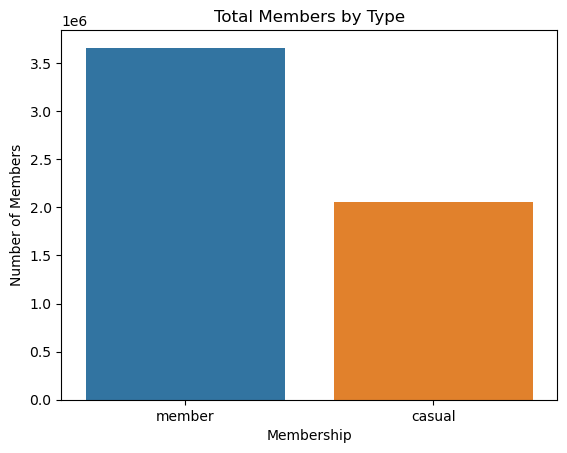

In [31]:
# no. of members

members_count_df = df['member_casual'].value_counts().reset_index()

members_count_df.columns = ['member_casual', 'count']
members_count_plot = sns.barplot(data=members_count_df, x='member_casual', y='count')
members_count_plot.set(title='Total Members by Type', xlabel='Membership', ylabel='Number of Members')

plt.show()

In [214]:
members_count_df

,member_casual,count
0,member,3659987
1,casual,2058621


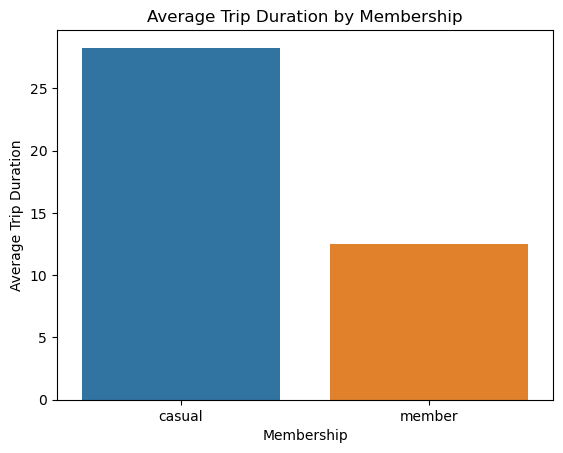

In [18]:
# Average trip duration

trip_duration_avg = df.groupby(['member_casual'])['trip_duration'].mean().reset_index()
trip_duration_avg.columns = ['member_casual', 'trip_duration_avg']

trip_duration_avg_plot = sns.barplot(data=trip_duration_avg, x='member_casual', y='trip_duration_avg') 
trip_duration_avg_plot.set(title='Average Trip Duration by Membership', xlabel='Membership', ylabel='Average Trip Duration')

plt.show()

In [22]:
trip_duration_avg

,member_casual,trip_duration_avg
0,casual,28.253878
1,member,12.527726


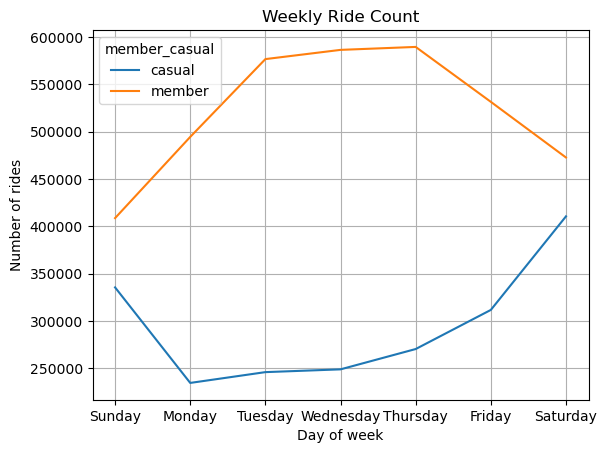

In [19]:
# no. of rides by weekday

order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=order, ordered=True)

df_weekly_count = df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='no_of_rides')

# Plot
weekly_ride_plot = sns.lineplot(data=df_weekly_count, x='day_of_week', y='no_of_rides', hue='member_casual')

plt.grid(True)
# Definindo os rótulos do eixo x na sequência desejada
#weekly_ride_plot.set_xticklabels(labels=order, rotation=0)

weekly_ride_plot.set(title="Weekly Ride Count", 
                     xlabel="Day of week", ylabel="Number of rides")
plt.show()

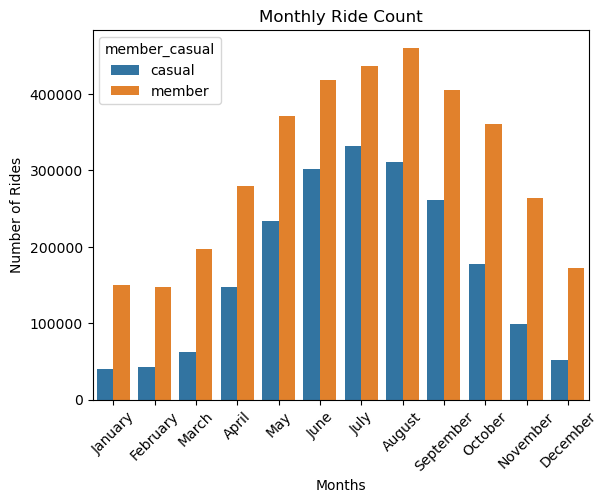

In [20]:
# no. of rides by month

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=order, ordered=True)

df_month_count = df.groupby(['month', 'member_casual']).size().reset_index(name='no_of_rides')
monthly_ride_plot = sns.barplot(data=df_month_count, x='month', y='no_of_rides', hue='member_casual', dodge=True)

monthly_ride_plot.set(title='Monthly Ride Count', xlabel='Months', ylabel='Number of Rides')
monthly_ride_plot.set_xticklabels(labels=order, rotation=45)

plt.show()

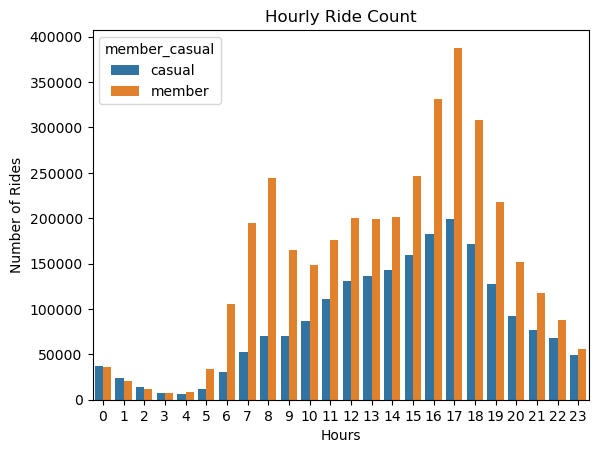

In [21]:
# Hour x no of rides, with members and casual

hourly_ride_plot = sns.countplot(x='hour', hue='member_casual', data=df)
hourly_ride_plot.set(title='Hourly Ride Count', xlabel='Hours', ylabel='Number of Rides')


plt.show()

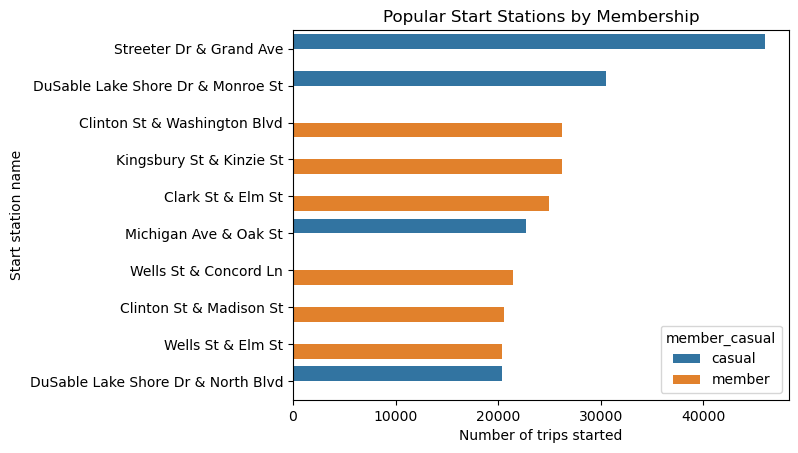

In [27]:
# top 10 most popular start station

df_routes_taken = df.groupby(['member_casual', 'start_station_name']).size().reset_index(name='n').sort_values(by='n', ascending=False).head(10)


routes_plot_start = sns.barplot(data=df_routes_taken, y='start_station_name', x='n', hue='member_casual')


routes_plot_start.set(title="Popular Start Stations by Membership",
                      xlabel="Number of trips started", ylabel="Start station name")

plt.show()

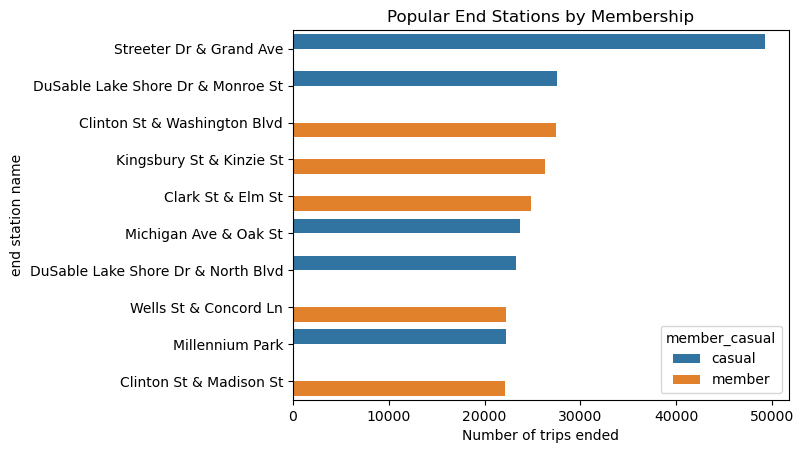

In [29]:
# top 10 most popular end stations

df_routes_ended = df.groupby(['member_casual', 'end_station_name']).size().reset_index(name='n').sort_values(by='n', ascending=False).head(10)


routes_plot_end = sns.barplot(data=df_routes_ended, y='end_station_name', x='n', hue='member_casual')

routes_plot_end.set(title="Popular End Stations by Membership",
                      xlabel="Number of trips ended", ylabel="end station name")

plt.show()

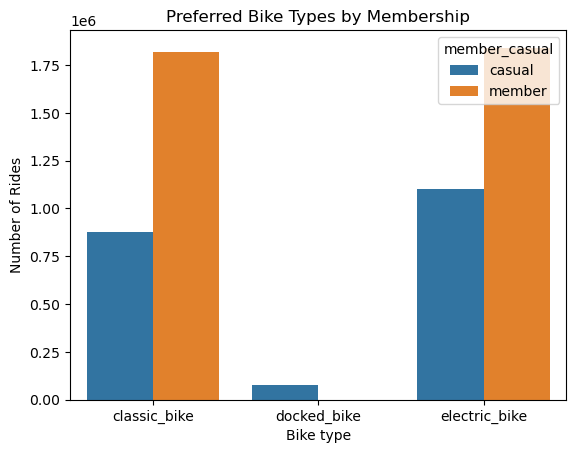

In [30]:
df_bike_type = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='no_of_rides')

bike_type_plot = sns.barplot(data=df_bike_type, y='no_of_rides', x='rideable_type', hue='member_casual')
bike_type_plot.set(title='Preferred Bike Types by Membership', xlabel='Bike type', ylabel='Number of Rides')

plt.show()

In [32]:
df_bike_type

,rideable_type,member_casual,no_of_rides
0,classic_bike,casual,876805
1,classic_bike,member,1819026
2,docked_bike,casual,78287
3,electric_bike,casual,1103529
4,electric_bike,member,1840961


### Conclusão

1. Em média a duração de uma corrida para membros casuais é de 28 min e para membros anuais é de 12 min. Portanto, o tempo médio de uma corrida para os membros casuais é de duas vezes mais que para os membros anuais.
2. Os membros casuais utilizam mais as bicicletas de quarta a sábado, enquanto que os membros anuais utilizam mais de segunda a sexta.
3. Os horários mais utilizados pelos membros anuais é às 8h e às 17h, já para os membros casuais o número de corridas cresce gradualmente durante o dia, começando às 5h até às 17h onde ocorre seu pico máximo.
4. A partir das três observações anteriores conseguimos concluir que os membros anuais utilizam a Cyclistic para se deslocar para o trabalho, enquanto que membros casuais à utilizam para atividades diversas.
5. Tanto para membros casuais e anuais o número de corridas cresce gradualmente de março à agosto e começa a decair de setembro a fevereiro, mostrando uma grande diminuição nos meses de inverno. Durante os meses de verão, onde se apresentam os maiores picos de corridas, poderiam ocorrer as campanhas de marketing para converter os membros casuais em anuais, nas estações mais populares para os membros casuais, como a  Streeter Dr & Grand Ave.
6. Membros anuais e casuais utilizam mais as bicicletas elétricas. Portanto, poderia-se investir mais nesse tipo de modalidade para atrair membros casuais.